In [1]:
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt 
import glob
import os
import math

# Multi Layer Perceptron - MLP

In [2]:
def read_data(im_data): #Membaca Data atay File image
    image_list = []
    for i, data in enumerate(im_data):
        if i < 100:
            image_data = Image.open(data).resize((320,240)).getdata()
            image_list.append(np.array(image_data)[:,0])
        else:
            break
    return image_list

def sigmoid_func(x, deriv=False):  #fungsi Sigmoid - bisa yang derivative atau yang tidak.
    if deriv == True:
        return x*(1-x)
    
    return 1/(1+np.exp(-x))

def get_error(y,l2, l1, w1):         #Menghitung error dan delta tiap layer
    l2_error = y - l2
    l2_delta = l2_error * sigmoid_func(l2, deriv=True)
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * sigmoid_func(l1, deriv=True)
    temp = 0
    for val in l2_error:
        temp += val**2
    error = (temp/len(l2_error))/2 
    return l2_error, l1_error, l2_delta, l1_delta, error
    

def initialize_random_weight(input_len, bias):  #Inisiasi Bobot dan bias. 
    np.random.seed(1)
    w0 = 2*np.random.random((input_len,16))-bias   #bobot dari input ke hidden layer 
    w1 = 2*np.random.random((16,1))-bias          #bobot dari hidden layer ke output
    return w0, w1
    
def feedforward(x, y, lr, epoch, w0, w1):       #feedforward propagation untuk training
    error_hist = list() 
    for j in range(epoch):
        l0 = x
        l1 = sigmoid_func(np.dot(l0, w0))
        l2 = sigmoid_func(np.dot(l1, w1))
        
        l2_error, l1_error, l2_delta, l1_delta, error = get_error(y, l2, l1, w1)
        error_hist.append(error)
        w0, w1 = backwardpropagation(w0,w1,l0,l1,l1_delta,l2_delta,lr)
    return w0, w1, error_hist

def backwardpropagation(w0, w1, l0, l1, l1_delta, l2_delta, lr): # backward propagation untuk update bobot
    w1 += l1.T.dot(l2_delta) * lr
    w0 += l0.T.dot(l1_delta) * lr
    return w0, w1
    
def predict(x,w0, w1):   #Untuk memprediksi , input berupa X, output berupa Y = 0 atau 1 atau 2 (3 kategori mewakili 3 bunga) 
    l0 = x

    l1 = sigmoid_func(np.dot(l0, w0[0]))
    ypred_1 = sigmoid_func(np.dot(l1, w1[0]))
    
    l1 = sigmoid_func(np.dot(l0, w0[1]))
    ypred_2 = sigmoid_func(np.dot(l1, w1[1]))
    
    l1 = sigmoid_func(np.dot(l0, w0[2]))
    ypred_3 = sigmoid_func(np.dot(l1, w1[2]))
    
    prediction = np.zeros(len(x))
    for i in range(len(x)):
        ypred = np.array((ypred_1[i],ypred_2[i],ypred_3[i]))
        if np.max(ypred) == ypred_1[i]:
            prediction[i] = 0
        elif np.max(ypred) == ypred_2[i]:
            prediction[i] = 1
        else:
            prediction[i] = 2
    return prediction
    
def get_accuracy(y, y_pred):  #Menghitung akurasi prediksi
    temp = 0
    for i,val in enumerate(y):
        if val == y_pred[i]:
            temp += 1
    print("Accuracy:", temp * 100 / len(y), "%")
    
def add_label(data):  #Melabeli data dengan kelas masing2. 0 = bunga1, 1 = bunga2, 2 = bunga3
    x = data  
    a = np.zeros((100,1))
    b = np.ones((100,1))
    c = b+1
    y = np.concatenate((a, b), axis=0)
    y = np.concatenate((y, c), axis=0)
    return np.concatenate((x, y), axis=1)

def getClass(data, target): #Mengetahui kelas dari tiap data
    if data == target:
        return 1
    else:
        return 0

def normalize_data(data): #normalisasi data menjadi rentang 0 sampai 1.
    return data/255

def split_data(data, train_size): #Memisah data menjadi data training dan data test
    data = normalize_data(data)
    data = add_label(data)
    np.random.shuffle(data)
    dtrain_len = int(len(data) * train_size/100)
    dtest_len = len(data) - dtrain_len
    x_train = list()
    x_test = list()
    y_train = list()
    y_test = list()
    for i in range(len(data)):
        if i < dtrain_len:
            x_train.append(data[i][:-1])
            y_train.append(data[i][-1])
        else:
            x_test.append(data[i][:-1])
            y_test.append(data[i][-1])
            
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train).reshape((1,len(y_train))).T
    y_test = np.array(y_test).reshape((1,len(y_test))).T
    return x_train, x_test, y_train, y_test 
        
def train_data(x, y, epoch, lr, bias):                   #Melakukan training data sebanyak epoch
    w0, w1 = initialize_random_weight(len(x[0]), bias)
    w0, w1, error = feedforward(x, y, lr, epoch, w0, w1)
    return w0, w1, error

def visualize_data(data):             #Memvisualkan data - digunakan untuk memvisualisasikan error.
    iteration = np.arange(len(data))    
    plt.plot(iteration, data)
    plt.show()

# Uji program MLP - 1 hidden layer, lr = 0.1, 300 data, 3 kelas

#Read data

In [3]:
data_path1 = os.path.join(r"C:\Users\ASUS\Documents\Lectures\Sem 6\Machine Learning\Flower tugas\sunflower",'*g')
data_path2 = os.path.join(r"C:\Users\ASUS\Documents\Lectures\Sem 6\Machine Learning\Flower tugas\dandelion",'*g')
data_path3 = os.path.join(r"C:\Users\ASUS\Documents\Lectures\Sem 6\Machine Learning\Flower tugas\rose",'*g')

sunflower_im = glob.glob(data_path1)
dandelion_im = glob.glob(data_path2)
rose_im = glob.glob(data_path3)

data1 = read_data(sunflower_im)
data2 = read_data(dandelion_im)
data3 = read_data(rose_im)
data = np.concatenate((data1,data2), axis=0)
data = np.concatenate((data,data3), axis=0)

#Split train data dan test data (80 : 20)

In [4]:
x_train, x_test, y_train, y_test = split_data(data, 80)

#Memisahkan y_train berdasarkan kelas

In [336]:
y_train1 = np.array([getClass(i, 0) for i in y_train]).reshape((len(y_train),1))
y_train2 = np.array([getClass(i, 1) for i in y_train]).reshape((len(y_train),1))
y_train3 = np.array([getClass(i, 2) for i in y_train]).reshape((len(y_train),1))

#Training data secara terpisah untuk masing2 kelas

In [517]:
w0_1, w1_1, error_1 = train_data(x_train, y_train1, 300, 0.1, 1)
w0_2, w1_2, error_2 = train_data(x_train, y_train2, 300, 0.1, 1)
w0_3, w1_3, error_3 = train_data(x_train, y_train3, 300, 0.1, 1)

#Menyatukan bobot tiap kelas dalam array berdasarkan layer

In [518]:
merged_w0 = np.array((w0_1,w0_2,w0_3))
merged_w1 = np.array((w1_1,w1_2,w1_3))

#Menguji data test dengan bobot hasil training

In [519]:
prediction = predict(x_test, merged_w0, merged_w1)

#Menghitung akurasi prediksi

In [524]:
get_accuracy(y_test, prediction)

Accuracy: 46.5 %


#Visualisasi rata2 error untuk tiap epoch

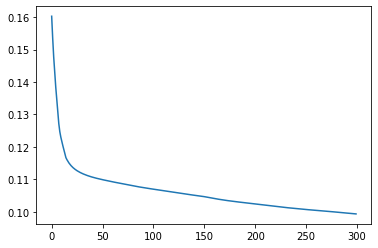

In [521]:
error = (np.array(error_1) + np.array(error_2) + np.array(error_3))/3
visualize_data(error)

# Convolutional Neural Network - CNN

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = np.array(x_train).reshape(-1, 320, 240, 1)
y = y_train

model = Sequential()

model.add(Conv2D(256, (1, 1), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(256, (1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())  #converts 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=1, epochs=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 240 samples
240/240 [==============================] - 221s 922ms/sample - loss: 11.2112 - acc: 0.3167


In [8]:
test_x = np.array(x_test).reshape(-1, 320, 240, 1)
predicted = model.predict(test_x)

In [18]:
predicted

array([[0.76059616],
       [0.9922166 ],
       [0.99003065],
       [0.9191489 ],
       [0.91062474],
       [0.85179293],
       [0.89032763],
       [0.9022995 ],
       [0.9950227 ],
       [0.79791534],
       [0.9728996 ],
       [0.9104487 ],
       [0.76287055],
       [0.9610584 ],
       [0.9843894 ],
       [0.6871304 ],
       [0.900128  ],
       [0.9813552 ],
       [0.9234251 ],
       [0.7397384 ],
       [0.87507355],
       [0.8745681 ],
       [0.78505254],
       [0.8679106 ],
       [0.91376334],
       [0.87622905],
       [0.7808049 ],
       [0.9980761 ],
       [0.7910283 ],
       [0.9282639 ],
       [0.883884  ],
       [0.9331442 ],
       [0.9622141 ],
       [0.8414798 ],
       [0.8674977 ],
       [0.74264646],
       [0.97356224],
       [0.9093888 ],
       [0.7601707 ],
       [0.8148985 ],
       [0.9694831 ],
       [0.9687842 ],
       [0.9013547 ],
       [0.7579924 ],
       [0.9865788 ],
       [0.9995137 ],
       [0.9967456 ],
       [0.893

# Perbandingan MLP vs CNN

Dari percobaan MLP menghasilkan hasil prediksi yang lebih baik
karena percobaan pada CNN hanya berhasil dilakukan dengan 1 epoch
dikarenakan Laptop tidak kuat.

Akurasi yang didapat: 
    MLP: 46.5%
    CNN: 31.6%
 
Keduanya masih belum optimal.

1- Untuk MLP, epochnya masih terlalu sedikit, dan jumlah node pada hidden layer terlalu sedikit dibanding jumlah input yang mencapai 320 x 240 = 78600.

2- Untuk CNN, hanya menggunakan 1 epoch, sehingga akurasi sangat buruk.